# Classification Procedures

##MIS776 Project, Group 1

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read data from the csv file and drop NAs
D = pd.read_csv('PANEL_MIS776_PROJECT_DB.xlsx - TheData.csv')
D = D.dropna()
D.describe()

,Categories,close,EMA50,lagged EMA50,RSI,RSI-based MA,RSI-RSIMA,ATR,ADX,MACD,...,ASOPR,AccuTrend,NUPL,BTCINFLATION,Liveliness,NVT,CVDD,SP500,NASDAQ,POSNEG
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,3.525814,19626.239682,19364.666307,19353.989824,51.884323,51.974594,-0.090270,1203.068250,29.893546,75.950979,...,1.015197,0.413125,0.375089,0.029678,0.607342,23.929025,5817.035685,3362.170254,10137.305852,0.506751
std,0.910070,17331.276733,16981.905266,16985.477645,14.046021,12.375539,8.504723,1146.911264,11.077689,1224.916859,...,0.054732,0.343531,0.235691,0.011707,0.011115,9.823700,4170.641717,692.995939,2944.556943,0.500153
min,1.000000,3195.710000,3512.931000,3468.602000,9.491250,16.531730,-27.502900,82.763160,8.965417,-4975.900000,...,0.798125,0.000000,-0.428840,0.010767,0.562490,2.146851,714.782900,2237.400000,6192.918000,0.000000
25%,3.000000,7199.500000,7250.471500,7245.610000,41.692505,43.143975,-5.455840,350.634300,21.134875,-333.009000,...,0.986448,0.107829,0.237173,0.018034,0.602538,17.419240,2741.884000,2783.160000,7576.962500,0.000000
50%,4.000000,10155.260000,10032.110000,10023.670000,50.690120,50.334330,0.056148,549.962200,27.756710,13.731780,...,1.007378,0.313273,0.411084,0.033378,0.609035,24.782030,4021.375000,3093.200000,8914.711000,1.000000
75%,4.000000,33611.585000,35442.080000,35533.005000,61.267315,60.739370,5.612537,1984.510000,37.257915,420.438350,...,1.036452,0.708253,0.535257,0.040176,0.614619,30.530040,9433.647000,4004.530000,13034.055000,1.000000
max,6.000000,67554.840000,59135.220000,59135.220000,94.550250,82.681060,26.600580,5304.350000,69.202100,5130.296000,...,1.397850,1.000000,0.793382,0.055817,0.623179,73.128820,14581.420000,4796.560000,16057.440000,1.000000


In [3]:
#Get numeric features only for X and the category variable for y
X = D.drop(["Categories","%Change","POSNEG", "lagged EMA50"], axis = 1)
y = D["Categories"]

# 6 Category Decision Tree Classification

In [4]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [5]:
y_train.mean()

3.4982973893303067

In [6]:
y_test.mean()

3.5899470899470898

In [7]:
from sklearn.tree import DecisionTreeClassifier
class_treeD3 = DecisionTreeClassifier(max_depth=3)
class_treeD3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [8]:
# Confusion matrix on train set
from sklearn.metrics import confusion_matrix
y_train_pred = class_treeD3.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[  0,   5,  11,   0,   0,   0],
       [  0,  18,  49,   6,   0,   0],
       [  0,  13, 229, 110,   0,   0],
       [  0,   1, 142, 198,  11,   0],
       [  0,   0,  18,  40,  14,   0],
       [  0,   1,   5,   8,   2,   0]], dtype=int64)

In [9]:
pd.crosstab(y_train, y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# A decision tree with max depth of 3 does not give any predictions of categories 1 or 6.
#So I stopped here and I am going to make a decision tree with max depth 4

Predicted,2,3,4,5,All
True,,,,,
1,5,11,0,0,16
2,18,49,6,0,73
3,13,229,110,0,352
4,1,142,198,11,352
5,0,18,40,14,72
6,1,5,8,2,16
All,38,454,362,27,881


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy.round(3)

#overal accuracy .521

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=y_train, y_pred=y_train_pred, average = None)
precision.round(3)

#precision array([0.   , 0.474, 0.504, 0.547, 0.519, 0.   ])

## Max Depth 4 Tree for 6 Categories

In [10]:
from sklearn.tree import DecisionTreeClassifier
class_treeD4 = DecisionTreeClassifier(max_depth=4)
class_treeD4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [11]:
# Confusion matrix on train set
from sklearn.metrics import confusion_matrix
y_train_pred = class_treeD4.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[  5,   0,   4,   7,   0,   0],
       [  3,  15,  32,  22,   0,   1],
       [  5,   8, 193, 146,   0,   0],
       [  0,   1,  86, 260,   5,   0],
       [  0,   0,  13,  45,  14,   0],
       [  0,   1,   4,   9,   0,   2]], dtype=int64)

In [12]:
pd.crosstab(y_train, y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,5,0,4,7,0,0,16
2,3,15,32,22,0,1,73
3,5,8,193,146,0,0,352
4,0,1,86,260,5,0,352
5,0,0,13,45,14,0,72
6,0,1,4,9,0,2,16
All,13,25,332,489,19,3,881


In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy.round(3)

#overal accuracy .555

0.555

In [14]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=y_train, y_pred=y_train_pred, average = None)
precision.round(3)

array([0.385, 0.6  , 0.581, 0.532, 0.737, 0.667])

In [15]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=y_train, y_pred=y_train_pred, average = None)
recall.round(3)



array([0.312, 0.205, 0.548, 0.739, 0.194, 0.125])

In [18]:
from sklearn.metrics import confusion_matrix
y_test_pred = class_treeD4.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[  3,   1,   2,   1,   0,   0],
       [  0,   3,  13,   5,   0,   1],
       [  2,   3,  71,  73,   2,   0],
       [  1,   0,  49, 101,   3,   2],
       [  0,   0,   0,  23,   0,   0],
       [  0,   0,   0,  19,   0,   0]], dtype=int64)

In [19]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,3,1,2,1,0,0,7
2,0,3,13,5,0,1,22
3,2,3,71,73,2,0,151
4,1,0,49,101,3,2,156
5,0,0,0,23,0,0,23
6,0,0,0,19,0,0,19
All,6,7,135,222,5,3,378


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
accuracy.round(3)

#Test accuracy about 10% worse

0.471

In [21]:
from sklearn.tree import DecisionTreeClassifier
class_treeD5 = DecisionTreeClassifier(max_depth=5)
class_treeD5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
# Confusion matrix on train set
from sklearn.metrics import confusion_matrix
y_train_pred = class_treeD5.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[  5,   7,   1,   2,   1,   0],
       [  3,  31,  24,  13,   2,   0],
       [  2,  10, 194, 143,   3,   0],
       [  0,   9,  65, 270,   7,   1],
       [  0,   1,  13,  38,  20,   0],
       [  0,   1,   0,   7,   4,   4]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy.round(3)

0.595

In [24]:
pd.crosstab(y_train, y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,5,7,1,2,1,0,16
2,3,31,24,13,2,0,73
3,2,10,194,143,3,0,352
4,0,9,65,270,7,1,352
5,0,1,13,38,20,0,72
6,0,1,0,7,4,4,16
All,10,59,297,473,37,5,881


In [25]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=y_train, y_pred=y_train_pred, average = None)
precision.round(3)

array([0.5  , 0.525, 0.653, 0.571, 0.541, 0.8  ])

In [26]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=y_train, y_pred=y_train_pred, average = None)
recall.round(3)



array([0.312, 0.425, 0.551, 0.767, 0.278, 0.25 ])

In [27]:
from sklearn.metrics import confusion_matrix
y_test_pred = class_treeD5.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[ 1,  2,  4,  0,  0,  0],
       [ 0,  2,  9,  8,  2,  1],
       [ 0,  6, 67, 72,  6,  0],
       [ 0,  8, 55, 82,  8,  3],
       [ 0,  0,  2, 21,  0,  0],
       [ 0,  2,  1, 16,  0,  0]], dtype=int64)

In [28]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,1,2,4,0,0,0,7
2,0,2,9,8,2,1,22
3,0,6,67,72,6,0,151
4,0,8,55,82,8,3,156
5,0,0,2,21,0,0,23
6,0,2,1,16,0,0,19
All,1,20,138,199,16,4,378


In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
accuracy.round(3)

#Test accuracy about 10% worse

0.402

## Niave Bayes 6 Cat

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred_nb = nb.predict(X_train)
confusion_matrix(y_train,y_train_pred_nb)

array([[  0,   0,  10,   6,   0,   0],
       [  0,   0,  45,  28,   0,   0],
       [  0,   0, 204, 148,   0,   0],
       [  0,   0, 178, 174,   0,   0],
       [  0,   0,  30,  42,   0,   0],
       [  0,   0,   9,   7,   0,   0]], dtype=int64)

In [32]:
pd.crosstab(y_train, y_train_pred_nb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,4,All
True,,,
1,10,6,16
2,45,28,73
3,204,148,352
4,178,174,352
5,30,42,72
6,9,7,16
All,476,405,881


In [33]:
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
accuracy.round(3)

0.429

In [34]:
y_test_pred_nb = nb.predict(X_test)
confusion_matrix(y_test,y_test_pred_nb)

array([[ 0,  0,  5,  2,  0,  0],
       [ 0,  0, 16,  6,  0,  0],
       [ 0,  0, 77, 74,  0,  0],
       [ 0,  0, 90, 66,  0,  0],
       [ 0,  0,  8, 15,  0,  0],
       [ 0,  0,  9, 10,  0,  0]], dtype=int64)

In [35]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)
accuracy.round(3)

0.378

## Decision Tree Method 2 Categories

In [7]:
#Get numeric features only for X and the category variable for y
X = D.drop(["Categories","%Change","POSNEG"], axis = 1)
y = D["POSNEG"]

In [8]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [9]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(max_depth=3)
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
from sklearn.metrics import confusion_matrix
y_train_pred = class_tree.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[308, 133],
       [151, 289]], dtype=int64)

In [11]:
pd.crosstab(y_train, y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,308,133,441
1,151,289,440
All,459,422,881


In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy.round(3)

0.678

In [42]:
from sklearn.metrics import precision_score
precision = precision_score(y_true=y_train, y_pred=y_train_pred, average = None)
precision.round(3)

array([0.671, 0.685])

In [43]:
from sklearn.metrics import recall_score
recall = recall_score(y_true=y_train, y_pred=y_train_pred, average = None)
recall.round(3)

array([0.698, 0.657])

In [12]:
pd.Series(data=class_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False).round(3)

RSI-RSIMA       0.872
SupplyP         0.091
BTCINFLATION    0.037
NASDAQ          0.000
EMA50           0.000
lagged EMA50    0.000
RSI             0.000
RSI-based MA    0.000
ATR             0.000
ADX             0.000
MACD            0.000
RP              0.000
RHODL           0.000
RR              0.000
MVRV-Z          0.000
MinerFeeRev%    0.000
SP500           0.000
Thermocap       0.000
AA              0.000
AVGFees         0.000
Puell           0.000
INVCAP          0.000
ASOPR           0.000
AccuTrend       0.000
NUPL            0.000
Liveliness      0.000
NVT             0.000
CVDD            0.000
close           0.000
dtype: float64

In [44]:
y_test_pred = class_tree.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[118,  62],
       [ 79, 119]], dtype=int64)

In [45]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
accuracy.round(3)

0.627

## Produce Decision Tree for the best model

In [46]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [47]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

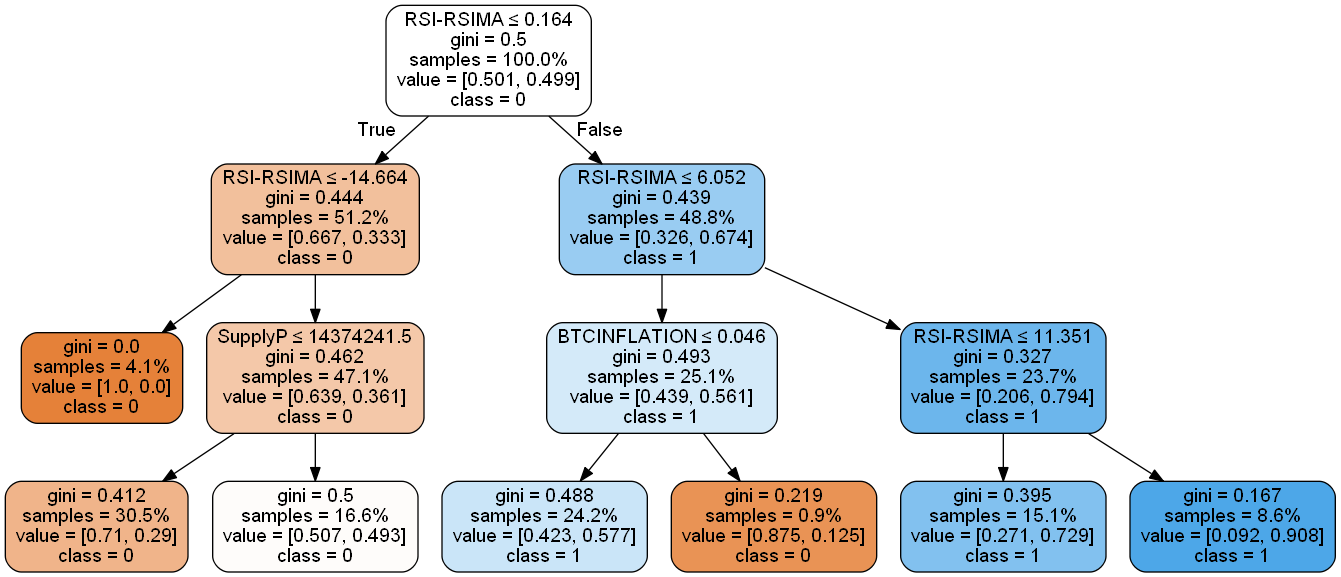

In [48]:
dot_data = StringIO()
export_graphviz(decision_tree=class_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                proportion=True,
                feature_names = X_train.columns,
                class_names = ["0","1"],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Niave Bayes 2 Cat

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred_nb = nb.predict(X_train)
confusion_matrix(y_train,y_train_pred_nb)

array([[212, 229],
       [178, 262]], dtype=int64)

In [50]:
pd.crosstab(y_train, y_train_pred_nb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,212,229,441
1,178,262,440
All,390,491,881


In [51]:
accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
accuracy.round(3)

0.538

In [52]:
y_test_pred_nb = nb.predict(X_test)
confusion_matrix(y_test,y_test_pred_nb)

array([[ 78, 102],
       [ 64, 134]], dtype=int64)

In [55]:
pd.crosstab(y_test, y_test_pred_nb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,78,102,180
1,64,134,198
All,142,236,378


In [56]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)
accuracy.round(3)

0.561

# Conclusion


The decision tree and niave bayes approachesboth turned out unsuccessful for the 6 category version. The test set accuracy was much lower than the train set accuracy, which indicates overfitting. In order to try and alleviate this issue, we attempted to remove variables, reduce the train set sample size, and we tried a variety of tree depths. None of these techniques helped the issue. 

The 2 category approach, was more succesful. The decision tree method had the best results with a train set accuracy of 67.8% and a test set accuracy of 62%. Although the test set accuracy was lower, it is not substantially different. We can conclude that if there is overfitting it is negligible. 